# Multi-panel figures in matplotlib

In [2]:
# initialization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Multi-panel figure via multiple .add_subplot() calls

Sometimes, your data visualizations may include multiple plots that are related to each other (e.g., sharing a common x-axis). Instead of treating these plots as separate, it may be useful to construct them as panels of the same figure.

You have already seen one example figure of this form, namely the 3-panel histogram from week 4. We'll now discuss how this plot is actually created in matplotlib.

Again, the data that we'll be using is:

In [3]:
heights_1 = np.array([
    177, 169, 182, 173, 171, 179, 179, 171, 175, 163, 
    180, 179, 179, 164, 173, 175, 177, 176, 181, 167, 
    173, 171, 175, 177, 181, 172, 178, 165, 174, 180, 
    173, 176, 180, 180, 179, 174, 175, 173, 179, 186, 
    175, 172, 175, 164, 176, 170, 174, 175, 178, 176
])

heights_2 = np.array([
    181, 163, 163, 174, 170, 173, 177, 174, 179, 187, 
    167, 174, 177, 173, 183, 155, 191, 165, 176, 180, 
    168, 178, 180, 179, 167, 191, 176, 165, 180, 175, 
    178, 146, 185, 176, 176, 171, 181, 182, 177, 186, 
    175, 171, 166, 170, 181, 174, 172, 179, 166, 170
])

heights_3 = np.array([
    166, 167, 167, 166, 167, 171, 161, 162, 171, 158,
    169, 156, 162, 168, 163, 164, 168, 155, 165, 166, 
    163, 161, 161, 167, 156, 166, 162, 163, 168, 168, 
    166, 165, 169, 174, 168, 160, 154, 174, 156, 171, 
    168, 163, 168, 160, 170, 162, 168, 169, 164, 176
])

To create multiple panels in a figure, all we have to do is to issue multiple `.add_subplot()` call. Moreover, to specify the layout of the figure, we will supply the first three positional argument (`nrow`, `ncol` and `index`) to `.add_subplot()`. Also note that `index` is a single integer that specifies both the row and column location, since the index increases first with columns and then with rows.

In our specific case, we will create 3 Axes instances like so:

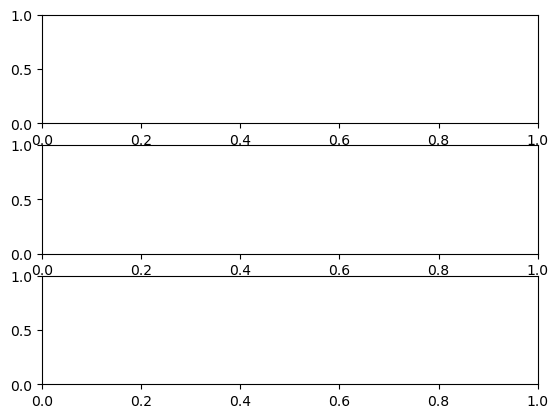

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

plt.show(fig)

Now we add content to each Axes instances just like we did with individual plots:

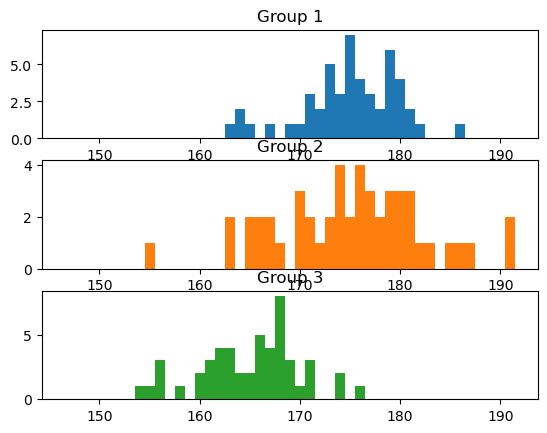

In [5]:
bins = np.arange(146.5, 192, 1)

fig = plt.figure()
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

ax1.hist(heights_1, bins=bins, color="tab:blue")
ax1.set_title("Group 1")

ax2.hist(heights_2, bins=bins, color="tab:orange")
ax2.set_title("Group 2")

ax3.hist(heights_3, bins=bins, color="tab:green")
ax3.set_title("Group 3")

plt.show(fig)

At first glance, the plots above seems to indicate that there are more individuals in group 2 than groups 1 and 3. But upon closer inspection, this is really because all 3 plots use different y axis.To force common axes, we use the `sharey=True` argument when creating the subplots (we also added `sharex=True`, even though it is not strictly necessary in this case):

In [21]:
bins = np.arange(146.5, 192, 1)

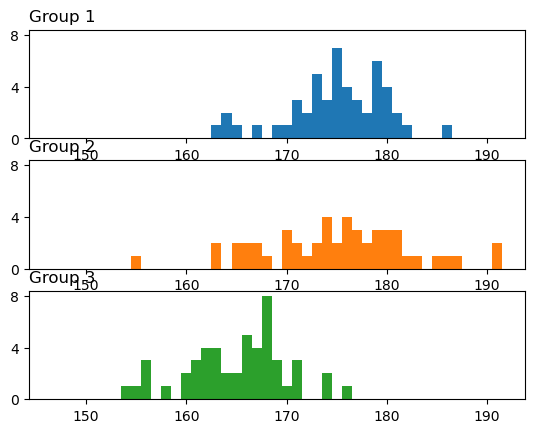

In [22]:
fig = plt.figure()
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2, sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(3, 1, 3, sharex=ax1, sharey=ax1)

ax1.hist(heights_1, bins=bins, color="tab:blue")
ax1.set_title("Group 1", loc="left")
ax1.set_yticks([0, 4, 8])

ax2.hist(heights_2, bins=bins, color="tab:orange")
ax2.set_title("Group 2", loc="left")

ax3.hist(heights_3, bins=bins, color="tab:green")
ax3.set_title("Group 3", loc="left")

plt.show(fig)

Next, we want to expand the space between plots to make the group labels clearer. We also want to reduce the reducdant x-axis label on the top two plots. The former can be achieved by a `Fig.subplots_adjust()` call with an `hspace` argument, the latter can be achieved using the `labelbottom` argument of the `tick_params()` call of the respective Axes instances:

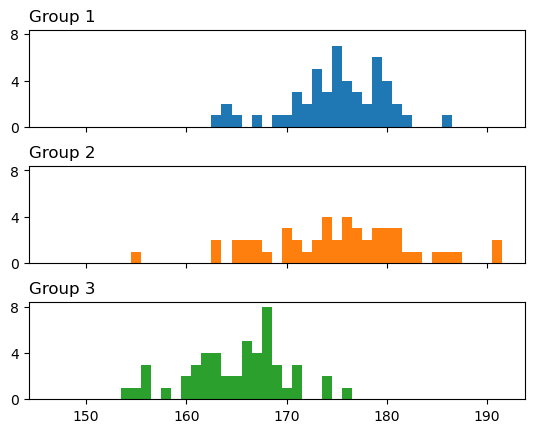

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2, sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(3, 1, 3, sharex=ax1, sharey=ax1)
fig.subplots_adjust(hspace=0.4)

ax1.hist(heights_1, bins=bins, color="tab:blue")
ax1.set_title("Group 1", loc="left")
ax1.tick_params(labelbottom=False)
ax1.set_yticks([0, 4, 8])

ax2.hist(heights_2, bins=bins, color="tab:orange")
ax2.tick_params(labelbottom=False)
ax2.set_title("Group 2", loc="left")

ax3.hist(heights_3, bins=bins, color="tab:green")
ax3.set_title("Group 3", loc="left")

plt.show(fig)

Finally, we can add overall x-axis label, y-axis label and figure title using `.supxlabel()`, `.supylabel()`, and `.suptitle()` method of the figure instance, respectively:

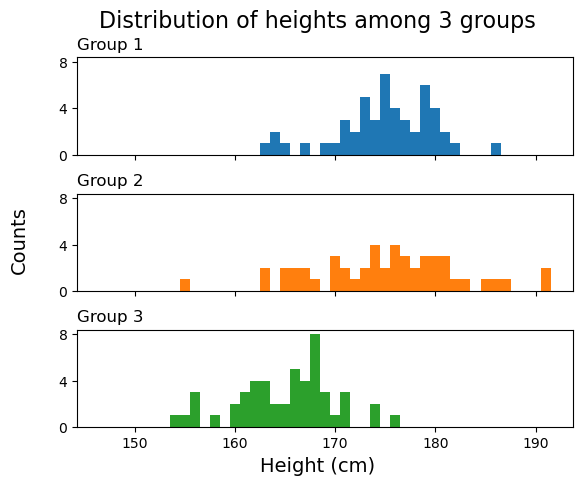

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2, sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(3, 1, 3, sharex=ax1, sharey=ax1)
fig.subplots_adjust(hspace=0.4)

ax1.hist(heights_1, bins=bins, color="tab:blue")
ax1.set_title("Group 1", loc="left")
ax1.tick_params(labelbottom=False)
ax1.set_yticks([0, 4, 8])

ax2.hist(heights_2, bins=bins, color="tab:orange")
ax2.tick_params(labelbottom=False)
ax2.set_title("Group 2", loc="left")

ax3.hist(heights_3, bins=bins, color="tab:green")
ax3.set_title("Group 3", loc="left")

fig.supxlabel("Height (cm)", fontsize=14)
fig.supylabel("Counts", fontsize=14)
fig.suptitle("Distribution of heights among 3 groups", fontsize=16)

plt.show(fig)